# Could we predict whether a patient suffers from a dysfunctionnal thyroid ?

### Authors: Nawel Arab, Pierre-André Mikem, Bertrand Paturel, Ramy Merabet, Kaixian Huang


The thyroid gland in the human body :

<div class="center"> 
<center>
<img src="https://www.endocrineweb.com/sites/default/files/imagecache/gallery-large/wysiwyg_imageupload/44069/2020/05/27/iStock-890741072.jpg
          " width="450"/>
</center>
</div>

Source : endocrineweb

# Table of Contents
1. [Introduction](#introduction)
    * [Context](#context)
    * [Functioning of the thyroid gland](#functioningofthethyroidgland)
    * [Problem description: Predict whether a patient has thyroid problem or not](#problemdescription:Predictwhetherapatienthasthyroidproblemornot)
2. [Data exploration](#dataexploration)
3. [Performance metric](#perfomancemetric)
    * [What criteria would be appropriate to maximise ?](#whatcriteriawouldbeappropriatetomaximise?)
4. [Submission](#submission)


# Introduction 
## Context
It is estimated that over 200,000 million people worldwide suffer from a thyroid disease, such as enlarged thyroid gland (goiter), thyroid nodules with or without cancer, hyperthyroidism or hypothyroidism. The influence of the thyroid gland on the body is major. Indeed, the role of this butterfly-shaped organ located at the base of the neck (under the Adam's apple) is to regulate the metabolism of the cells in our body. It therefore determines the speed of the "motor" of our cells and organs and is involved in the proper functioning of our organs: the heart, muscles, brain, but also the digestive tract, bone health, regulation of our temperature and energy ... When the thyroid gets excited about producing hormones, the body does the same in its energy combustion, running several vital functions at full speed. This is called hyperthyroidism. On the contrary, when the gland is idling and not producing enough hormones, it is called hypothyroidism.


## Functioning of the thyroid gland

Functioning of the thyroid gland system :

<div class="center"> 
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Thyroid_system.svg/495px-Thyroid_system.svg.png" width="300"/>
</center>
</div>

Source : wikipedia

From iodine, the thyroid produces important hormones: tetra-iodothyronine (T4), also called thyroxine, and tri-iodothyronine (T3). These hormones control our metabolism and control the body's chemical functions (oxygen consumption, body temperature, use of sugar, proteins...) and thus act on many systems such as the heart rate, the rate at which calories are burned, skin integrity, growth, heat production, fertility and digestion. 

The production of hormones by the thyroid gland is coordinated by the pituitary gland, an endocrine gland located in the brain.
The pituitary gland produces its own hormone, thyroid stimulating hormone or TSH. This hormone circulates in the blood and acts on the cells of the thyroid gland causing an increase in the production of T3 and T4. Some of this production, released into the bloodstream, returns to the pituitary gland.

The pituitary gland is informed in real time of the amount of thyroid hormones circulating in the body. The pituitary gland then adjusts its action by increasing or decreasing the production of TSH. The regulation of thyroid activity thus works in a loop between the thyroid and pituitary gland, which interact according to the body's needs. For this reason, TSH is often measured by taking a blood test as an indicator of thyroid activity. However, sometimes this mechanism can become unbalanced; too much thyroid hormone can lead to hyperthyroidism and too little can lead to hypothyroidism.


## Problem description: Predict whether a patient has a thyroid problem or not

As said above the thyroid hormones have quite an important effect on the functionning of the human body. Indeed hyperthyroidism and hypothyroidism can lead to more severe health problems such as depression, a lack of tonus,
memory loss, difficulty concentrating, a slower heart rate. Untreated thyroidism can increase the risk of cardiovascular accidents (myocardial infarction, stroke, etc.) and other potentially serious complications. During  pregnancy,  it  can  lead  to health problems for the mother and the baby . It is therefore fundamental to detect thyroid dysregulation early enough to avoid non-healable damage to the body. Ideally, medical analysis laboratories could be equipped with an automatic detection system for thyroid dysregulation to allow better management.

In order to do this, for this challenge we propose you to predict, based on a patient's medical examination, whether or not the latter is suffering from thyroid problems. In the approach, to automate thyroid diagnostics you will rely on three seperate data bases containing the balance sheet of *many* patients, in particular clinical and biological results of a medical examination for healthy patients, and others suffering from hypothyroidism, and hyperthyroidism.


Let's first take a look at our data!

# Data exploration
### Import

First we shall import our libraries to read and show our dataset.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import random

## The data set :
Our data set contains :

  - 21 features 
  - the label to predict : if the patient has a normal judged thyroid or if he suffers from hyper or hypothyroidism.

The data set has been found on https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/. Yet this data set has not been made for a competition, it is a raw data set with some already preprocessed features and unbalanced labels.

First of all, we are making an easy class to import the data set from the web to get an insight of our features and labels.

In [184]:
### A class to see how our data set on the web looks like ###

# Select the path you want to choose :
raw_path = "data/external_data/ann-train.data" 

# The name of the features and target
features = ["age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH","T3", "TT4","T4U", "FTI"] # rename the column by their names
target = ["disease"]

# a simple class to get an inside of what train and test data will both look
class get_data:
    def __init__(self, path, features=features, target=target, sep=" ", header=None, na_values="?", cols_todrop=[]):
        self.features = features
        self.target = target
        self.data_frame = pd.read_csv(path, sep = sep, header=header, na_values=na_values).drop(cols_todrop, axis=1).dropna()
        self.data_frame.columns = features + target
  
    def features_target(self):
        return self.data_frame.drop(target, axis=1), self.data_frame.loc[:,target]

In [185]:
raw_features, raw_target = get_data(raw_path, cols_todrop=[22,23]).features_target() # to get an insight of the training data set on the web
raw_features['disease'] = raw_target
raw_features.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,disease
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


Let's take a look at the number of observations in our data set.

In [186]:
raw_features.shape

(3772, 22)



## The features :
We divide our 21 feature in two categories, clinical and biological ones. We detail the main clinical results bellow : 
* **Age:** Age of the patient (0.01--0.97). Continuous variable.
* **Sex:** Sex of the patient, 0 (Male) 1 (Female). Binary variable.
* **On thyroxine/query on thyroxine:** Indicates if a patient is on/need thyroxine (T4). Binary variable.
* **On antithyroid medication:** Indicates if a patient is on antithyroid medication. Binary variable.
* **I131 treatment:** Indicates whether the patient is taking iodine-based treatment. Binary variable.
* **Goitre:** Indicates whether the patients has goitre issues or not. Binary variable.
* **Hypopituitary	:** production deficiency of one or more of the pituitary hormones.


And the biological features:
* **TSH:** Thyroid Stimulating Hormone, controls the  amount  of  T3  and  T4 hormones in the blood. Continuous variable.
* **T3:** Tri-iodothyroninen, thyroid hormone used  for determining  the  severity of the hyperthyroidism or to diagnose the hyperthyroidism. Continuous variable.
* **TT4:** Total  T4, or total thyroxine, is thyroid hormone, helps determine what type of problem is affecting your thyroid. Continuous variable.
* **T4U (T4 uptake) and FTI (Free  T4  Index)** : just different measures of T4. Continuous variables.



 ## The labels :

The problem is to determine whether a patient has a thyroid problem or not. Therefore three classes are considered on our datasets: 

- Hypothyroidism, or underactive thyroid: class 1
- Hyperthyroidism, or overactive thyroid : class 2
- Healthy : class 3

Each classe has been annotated by doctors for each patient.

The aim of this challenge is to predict whether a patient is in one of these three classes :  this is a multi-class classification problem.



In [187]:
raw_target.head() #our target for training

,disease
0,3
1,3
2,3
3,3
4,3


Let's observe the distribution of classes in our data set.

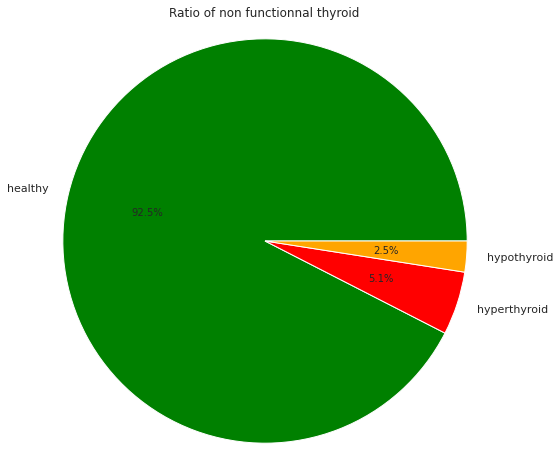

In [188]:
def plot_pie(y):
  plt.figure(figsize=(8,8))
  class_thyroid = [sum(y==3), sum(y==2), sum(y==1)]
  labels = ['healthy', 'hyperthyroid', 'hypothyroid']
  plt.pie(class_thyroid, 
          labels=labels,
          colors=['green', 'red', 'orange'],
          autopct='%1.1f%%')
  plt.title("Ratio of non functionnal thyroid")
  plt.axis('equal')
  plt.show()

plot_pie(raw_target['disease'])

## Data augmentation

The pie above shows that our dataset is really unbalanced. The number of patients who don't suffer of hypo or hyperthyroidism is $\approx$ $92.5\%$. To address that, below is imported a new data set. This results of the concatenation of the first raw unbalanced data set with two other data sets containing people suffering from hyperthyroid or hypothyroid. These datasets have been obtained with a database which is also present in our <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/">source </a>. If you want to see the files in question, their names are *allhypo* and 
*allhyper*.

Because our final dataset comes from different databases, there is some features that are differently scaled from one database to another. More precisely, in the first database the features have been scaled to be trained on a specific model. And that's not the case in the second database. Hence, before the data augmentation step, we removed the preprocessing done on the raw dataset above. The final values are the ones directly obtained from the measures.

In [190]:
def get_train_data(path="."):
    return pd.read_csv("data/train.csv")

path_train = "data/train.csv" 

features_train = get_train_data()
target_train = features_train['disease']

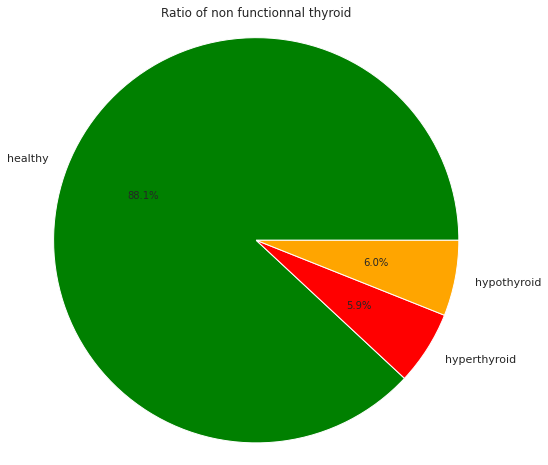

In [191]:
# New ratio
plot_pie(target_train)

This new data set is therefore slightly better balanced than the previous one.

In [192]:
features_train.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,disease
0,64.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,2.20,2.01,111.0,0.97,114.0,3
1,64.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.30,2.80,123.0,1.23,100.0,3
2,42.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.02,2.60,138.0,1.58,88.0,3
3,71.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.10,1.40,120.0,0.87,138.0,3
4,27.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.02,5.30,272.0,0.97,281.0,2


It is interesting to note that the data are not represented in the same way in this data set and in the previous one: it is therefore necessary to set up a cleaning and pre-processing step allowing a common processing of both data sets. This will be repeated in the following.

In [193]:
nRow, nCol = features_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6813 rows and 22 columns


In [194]:
features_train.dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
disease                        int64
dtype: object

$\textbf{Remark:}$ Because 88 percent of the patients are negative/healthy, a good classifier must be significant better than 88% (consider the trivial classifier that assigns class 3 to every observation). Thus, we shall work with unbalanced data and take it into account during the project.

## Dealing with missing values


For various reasons, it is possible that our dataset contains missing values. Indeed, there may be problems with the recording of clinical data, or absence of clinical data recording (absence of medical examination, machinery problems, data transmission problems, ...). It is fundamental to take this aspect into account because it could lead to problems when learning a model.

In [195]:
# List of columns containing null values
nNA = len(features_train.columns[features_train.isnull().any()].tolist())
print(f'There are {nNA} column(s) with missing values in the augmented data set.')

There are 6 column(s) with missing values in the augmented data set.


As a first approach, we simply propose to delete the columns of our data set containing missing values. Of course, you can propose your own data imputation method, much more sophisticated than this one (replacement by the mean value, use of a kNN algorithm, ...).

In [196]:
features_train.dropna(inplace=True)
target_train = features_train['disease']

## Analysis of the biological and clinical features
We now proceed to the analysis of the biological features of the medical assessment. We first take a look at the characteristics of the hormones by using the summary function and plotting the distributions of the features

In [197]:
def summary(X, y, feature):
    X_c = X.copy()
    X_c['disease'] = y
    X_f = X_c[[feature,'disease']].copy()
    return X_f.groupby('disease').describe()

label_names = {1: 'hypothyroid', 2: 'hyperthyroid', 3: 'healthy'}
y_train = target_train.replace(label_names)

summary(features_train, y_train, 'TSH')

TSH                                                           
               count       mean        std    min      25%    50%    75%    max
disease                                                                        
healthy       6000.0   2.086413   5.044683  0.000   0.6300   1.50   2.32  177.0
hyperthyroid   384.0  11.828359  12.041168  0.005   6.7000   8.89  13.00  143.0
hypothyroid    342.0  62.096667  90.559883  4.600  10.0725  27.50  65.00  530.0

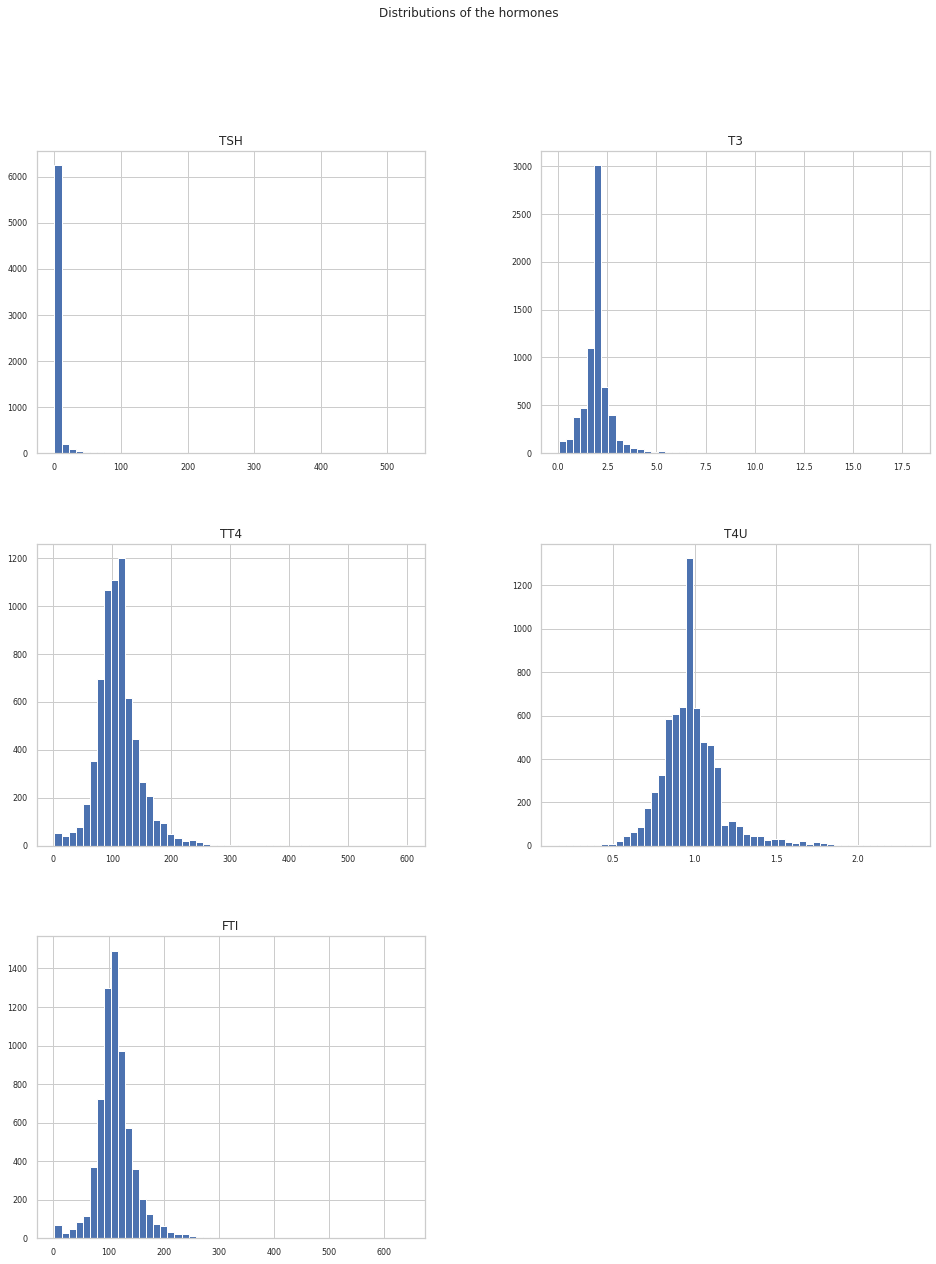

In [198]:
biological_features = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
features_train[biological_features].hist(figsize=(16, 20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.suptitle('Distributions of the hormones')
plt.show()

Some Machine Learning models require you to make strong assumptions about the distribution of observations; these graphs may give you some ideas!

In addition, the observation of feature distributions could be useful to you in a perspective of data imputation by simulation, via a slightly non-traditional method.

To be more precise, let's take the example of the biological variable TT4. Visually, the empirical distribution seems to be close to a Gaussian distribution. Suppose there are missing values in the column corresponding to TT4. One way to impute these missing data would be to assume that TT4 is distributed according to a Gaussian distribution, to adjust the parameters of this Gaussian by statistical methods (MLE, moments for example), and then to simulate according to the Gaussian thus determined. This is just one idea among others, nothing says that it works better than another !

Note, however, that the approach can be much more difficult to implement for non-quantitative variables: if you want to use it, it is up to you to find a clever way to model your data to implement it !

#### Correlation study


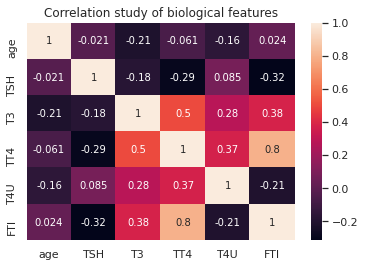

In [199]:
corrMatrix = features_train[[ 'age','TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation study of biological features')
plt.show()

Before the training starts, we have to find the attributes that are the most related to the target:


In [200]:
corr_values = abs(features_train[features_train.columns[0:]].corr()['disease'][:])
corr_values = corr_values.drop('disease')
corr_values = corr_values[corr_values > 0.10]
corr_values

TSH    0.503004
T3     0.201048
TT4    0.318355
FTI    0.335528
Name: disease, dtype: float64

You can then use these results to extract only the variables most correlated to the target.

### Gender and age effect on thyroid diseases

 We aimed to explore the impact of gender and age on thyroid disfunctionalities. 

In [201]:
tempdf=features_train.groupby(['sex','disease']).disease.count().unstack().fillna(0)
tempdf['total']=features_train['sex'].value_counts()
print(tempdf)


disease    1    2     3  total
sex                           
F        272  306  4145   4723
M         70   78  1855   2003


The augmented data set contains 6725 patients, including 4723 women and 2003 men.

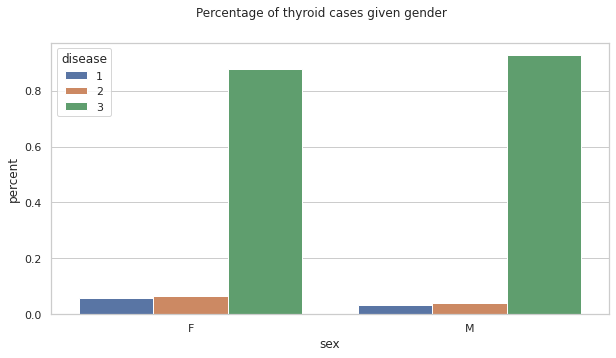

In [202]:
pct = (features_train.groupby(['sex','disease']).size() / features_train.groupby(['sex']).size()).reset_index().rename({0:'percent'}, axis=1)
f = plt.figure(figsize=(10, 5))
f.suptitle('Percentage of thyroid cases given gender')
sns.barplot(x='sex', hue='disease', y='percent', data=pct)
plt.show()

Thyroid disorders are very common and affect women in particular; approximately 2% of them are affected. According to medical studies hypothyroidism and hyperthyroidism are 10 times more common for women than for men. The role of sexual hormones on the immune system seems to be at the origin of this difference. Estrogens, the main female hormones, could decrease the immune tolerance causing a consequent increase in autoimmune diseases such as thyroid. There are also peaks of incidence that correspond to episodes in women's lives when hormones are "pushed": pregnancy, postpartum, menopause.

We observe that indeed, the proportion of women affected by one of the thyroid disorders is higher than that of men. In particular, $12.23\%$ of women are affected compared to $7.38\%$ for men.

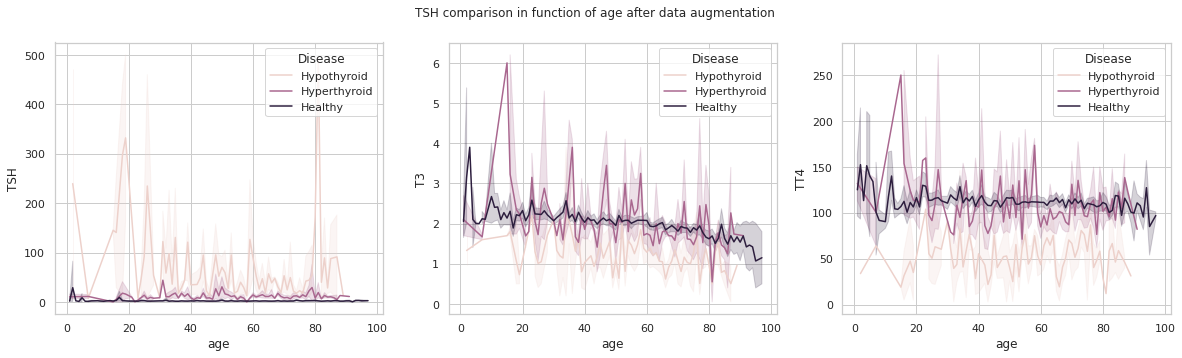

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(20,5) )
fig.suptitle('TSH comparison in function of age after data augmentation')
sns.lineplot(data= features_train, x="age",y="TSH", hue="disease", ax=axes[0])
axes[0].legend(loc="upper right", title="Disease", labels=['Hypothyroid', 'Hyperthyroid', 'Healthy'])
sns.lineplot(data= features_train, x="age",y="T3", hue="disease", ax=axes[1])
axes[1].legend(loc="upper right", title="Disease", labels=['Hypothyroid', 'Hyperthyroid', 'Healthy'])
sns.lineplot(data= features_train, x="age",y="TT4", hue="disease", ax=axes[2])
axes[2].legend(loc="upper right", title="Disease", labels=['Hypothyroid', 'Hyperthyroid', 'Healthy'])

Two important picks are noticeable, the first one being around the adolescence age phase and the second one corresponds to the old age phase:

**Adolescence age phase:** In the adolescence period, the thyroid is particularly solicited. Changes in thyroid function and increased thyroid volume allow the body to adapt to this stage of life, including growth and sexual development.

**Old age phase:** The risk of developing thyroid disease increases with age, like all organs, the thyroid gland ages and causes disorders. After the age of $60$, $10-15\%$ of the population is affected by hypothyroidism and 1-3% by hyperthyroidism. There's also a causal link with the fact that frequent polymedication at this age increases the risks of seeing certain drugs rich in iodine leading to thyroid disorders.





In [204]:
tempdfT = features_train
tempdfT.loc[(features_train.age > 50),  'AgeGroup'] = 'Old'
tempdfT.loc[(features_train.age < 20),  'AgeGroup'] = 'Teen'


tempdf=tempdfT.groupby(['AgeGroup','disease']).disease.count().unstack().fillna(0)
tempdf['total']=tempdfT['AgeGroup'].value_counts()
print(tempdf)


disease     1    2     3  total
AgeGroup                       
Old       212  253  3313   3778
Teen       12   19   246    277


### Understanding the hormones behaviour

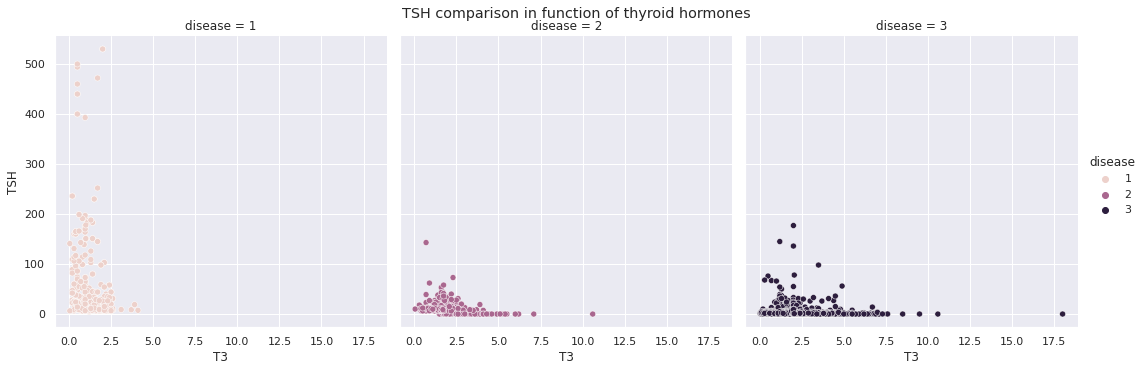

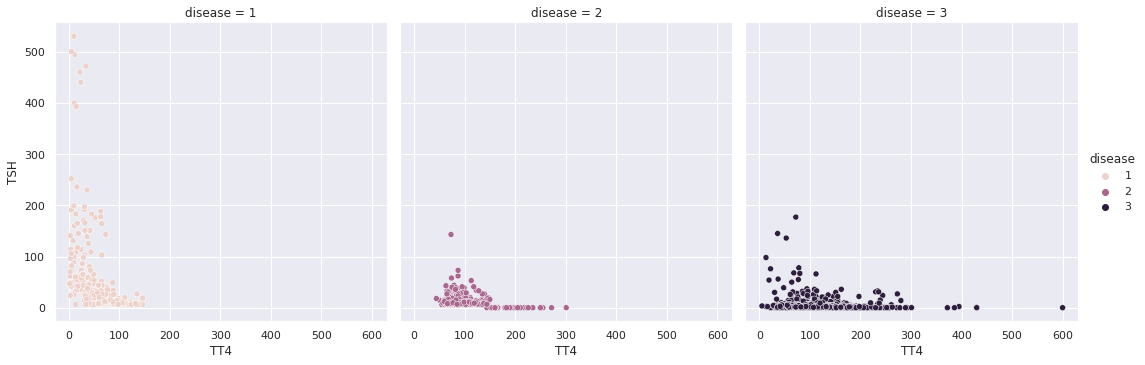

In [205]:
sns.set_theme()
g = sns.relplot(data= features_train, x="T3",y="TSH", col="disease", hue='disease')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('TSH comparison in function of thyroid hormones') 
sns.relplot(data= features_train, x="TT4",y="TSH", col="disease", hue='disease')

* **Disease1:** These graphs illustrate the behavior of thyroid hormones, when the blood level of thyroid hormones T3 and T4 drops, it stimulates the pituitary gland and causes the release of TSH. If the thyroid gland doesn't respond the TSH rate just keeps increasing until its normal rate is exceeded. This is what we call hypothyroidism.

* **Disease2:**  On the other hand, when the TSH value are small it coincides with abnormally high values of T3 and TT4 in the blood. Indeed, when the thyroid gland produces too much hormones the pituitary gland reduces producing TSH in order to regulate the production of T3 and TT4. Once again, if the thyroid gland is not functionning well, the TSH production keeps decreasing until stopping. This is defined as hyperthyroidism.

* **Disease3:** In the healthy case, the TSH and the thyroid hormones take normal values, neither too high nor too low, which indicates a normal functionning of thyroid system.


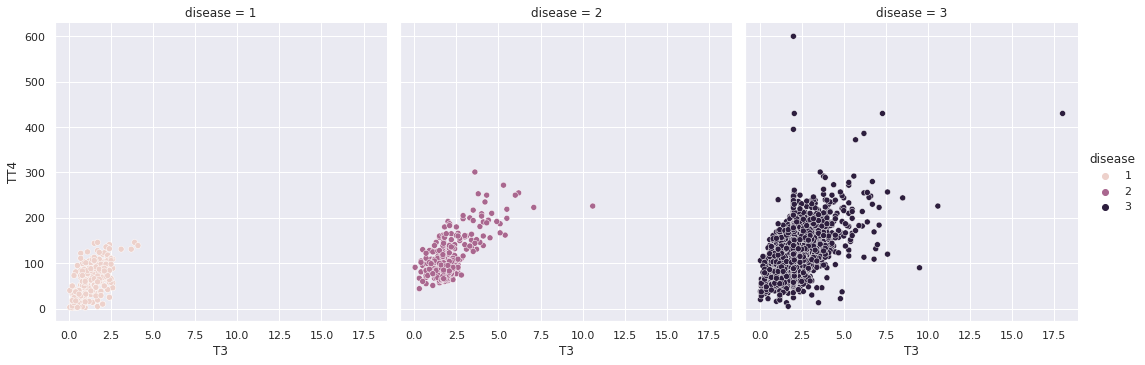

In [206]:
sns.relplot(data= features_train, x="T3",y="TT4", col="disease", hue='disease')

 Thyroid hormones T3 and TT4 are strongly bonded and act similarly. Their concentration rate in the blood increases or decreases simultaneously. We notice the existence of a proportionality relation between TT4 and T3 hormones. Once again, low values of thyroid hormones are observed for hypothyroidism while the inverse happens for hyperthyroidism.





# Performance metric
## What criteria would be appropriate to maximise ? 

- Could we take the accuracy as the ratio of good prediction over the total number of prediction ? We could naively choose the accuracy ratio of prediction yet it would not take into account the link between each classes and their level of importance.

- What measure should be defined to quantify our proportion of sucess ? An hyper or hypo thyroid if detected could involve serious treatments $[1]$. Thus we prefer to tell a patient that he is healthy while the patient should be detected with an hypothyroidism or hyperthyroidism. In fact we prefer a lower recall than a lower precision for the healthy class.

We can define 6 metrics to be computed : 

1. Two for the healthy score : 
$
        Precision_{healthy} = \frac{TP_{healthy}}{TP_{healthy}+FP_{healthy}}
        \quad, \quad
        Recall_{healthy} = \frac{TP_{healthy}}{TP_{healthy}+FN_{healthy}} \enspace.
$

2. Two for the hypothyroidism  score : 
$
        Precision_{hypo} = \frac{TP_{hypo}}{TP_{hypo}+FP_{hypo}}
        \quad, \quad
        Recall_{hypo} = \frac{TP_{hypo}}{TP_{hypo}+FN_{hypo}} \enspace.
$

3. Two for the hyperthyroidism  score : 
$
        Precision_{hyper} = \frac{TP_{hyper}}{TP_{hyper}+FP_{hyper}}
        \quad, \quad
        Recall_{hyper} = \frac{TP_{hyper}}{TP_{hyper}+FN_{hyper}} \enspace.
$

For instance given the predictions below : 

| Prediction \ Reality | Healthy    | Hypothyroidism   | Hyperthyroidism   |
|:-------------|:-----------|:------|:------|
|  Healthy  | 90       | 5   | 10     |
|  Hypothyroidism   | 10    | 10   | 5     |
|  Hyperthyroidism   | 10    | 5   | 15     |

We have : 

1. 
$
        Precision_{healthy} = \frac{90}{90+5+10}
        \quad, \quad
        Recall_{healthy} = \frac{90}{90+10+10} \enspace.
$

2. $
        Precision_{hypo} = \frac{10}{10+10+5}
        \quad, \quad
        Recall_{hypo} = \frac{10}{10+5+5} \enspace.
$

3. $
        Precision_{hyper} = \frac{15}{15+10+5}
        \quad, \quad
        Recall_{hyper} = \frac{15}{15+10+5} \enspace.
$


Based on these mertics we could define a new metric based on the average of each F1-score : 

For a given class we can compute : 
$$
    \text{F1-score}_{class} = 2 * \frac{P_{class} . R_{class}}{P_{class} + R_{class}}\enspace.
$$

then a natural metric could be 

$$
    \text{Score} = f(\text{F1-score}_{healthy},\text{F1-score}_{hypothyroidism },\text{F1-score}_{hyperthyroidism}) 
$$

The classic F1-score give the same weight to the precision and the recall. Yet we prefer a lower recall than a lower precision for the healthy class. Thus we change this balance by using a modified f1-score for a given value $\beta > 0$
$$
    \text{F1-score}^\beta =  (1 + \beta^2) * \frac{P . R}{\beta^2 P + R} \enspace .
$$

with $\beta = 0.95$ to give more weight to the recall than the precision for the healthy class.

Now we should choose our function f to define our score :
$$
    \text{Score} = f(\text{F1-score}^\beta_{healthy},\text{F1-score}_{hypothyroidism },\text{F1-score}_{hyperthyroidism}) = \text{Average}(\text{F1-score}^\beta_{healthy},\text{F1-score}_{hypothyroidism },\text{F1-score}_{hyperthyroidism}) = \frac{\text{F1-score}^\beta_{healthy}+\text{F1-score}_{hypothyroidism }+\text{F1-score}_{hyperthyroidism}}{3}
$$

One must remark that this function take into account the fact that we work on Imbalance data, since a dummy classifier predicting the majority class will have a score around 0.3. This is due to the fact that with a dummy classifier $\text{F1-score}_{hypothyroidism }$ and $\text{F1-score}_{hyperthyroidism}$ are equals to 0.

In [207]:
### definition of our score 
from sklearn.metrics import make_scorer # this function make_scorer will allow to make understable our score for a grid search cv for instance
from sklearn.metrics import f1_score, fbeta_score # These are the score f_score and fbeta_score used to make our score

def thyroid_metric(y, y_pred):
  f_score = f1_score(y_true=y, y_pred=y_pred, labels=[1, 2], average=None)
  f_beta_score = fbeta_score(y_true=y, y_pred=y_pred, beta=0.95, labels=[3], average=None)
  res =(f_score[0] + f_score[1] + f_beta_score[0])/3
  return res

thyroid_score = make_scorer(thyroid_metric, greater_is_better=True)

Below we show you an exemple to use the score on a GridSearchCv to finetune your parameters of your models. You should know that the metrics that has been choosen is the metric implemented above. Your scores and your rank will depend on it.

In [209]:
### How to make a model selection with the thyroid scorer :
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid_number = np.linspace(10,1000,num=100,dtype=int)
gridrf = {'n_estimators':grid_number}
rf_CV = GridSearchCV(estimator = RandomForestClassifier(),param_grid=gridrf,scoring=thyroid_score)

# Example of Prediction

Now we show you some examples of basic classifiers to predict whether the patient suffer from hyper or hypothyroidism or not. The first examples are very basic. They are mainly here to highlights the difference between the implemented score and the accuracy. The first step is to import data and the implemented score.

In [210]:
X_train.notna().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
6808    True
6809    True
6810    True
6811    True
6812    True
Length: 6813, dtype: bool

In [211]:
def dropna_and_scale(X):
  X_new = X.dropna()
  columns = X_new.columns.tolist()
  for col in columns:
    X_new.loc[:,col] -= X_new[col].mean()
    X_new.loc[:,col] *= 1. / X_new[col].std()
  return X_new

In [212]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

def get_train_data(path="."):
    return pd.read_csv("data/train.csv")

def get_test_data(path="."):
    return pd.read_csv("data/test.csv")

X_train = get_train_data()#.dropna() # Here you get the data train with this class
X_test = get_test_data()#.dropna() # Here you get the data test with this class
y_train, y_test = X_train['disease'], X_test['disease']

cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]

ct = make_column_transformer(('passthrough', cols))
clf = RandomForestClassifier(max_depth=None, min_samples_split=6, 
                             min_samples_leaf=6,
                             class_weight="balanced_subsample",random_state=0)

imp = SimpleImputer(strategy='most_frequent')
pipe = make_pipeline(ct,imp,clf)


pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('passthrough', 'passthrough',
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI'])],
                                   verbose=False)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
              

**Due to the fact that our data is skewed, we will now check the accuracy and our own score if the prediction is deterministic.**

In [213]:
RF_test = X_test
RF_test_target = y_test
benchmark1 = thyroid_metric(RF_test_target,3*np.ones_like(RF_test_target))
accuracy1 = np.mean(RF_test_target==3*np.ones_like(RF_test_target))
print('If a classifier only predict 3(health)')
print('Our score is ',benchmark1)
print("The accuracy is ",accuracy1)

If a classifier only predict 3(health)
Our score is  0.310997632661176
The accuracy is  0.8797886393659181


Our score give us 0.3 while the accuracy is 87% when we only predict class 3 (non suffering patient).

In [214]:
benchmark2 = thyroid_metric(RF_test_target,2*np.ones_like(RF_test_target))
accuracy2 = np.mean(RF_test_target==2*np.ones_like(RF_test_target))
print('If a classifier only predict 2(hyperthyroid)')
print('Our score is ',benchmark2)
print("The accuracy is ",accuracy2)

If a classifier only predict 2(hyperthyroid)
Our score is  0.037406483790523685
The accuracy is  0.059445178335535004


Our score give us 0.3 in score while the accuracy is 6% when we only predict class 2 (hyperthyroidism patient).

In [ ]:
benchmark3 = thyroid_metric(RF_test_target,np.ones_like(RF_test_target))
accuracy3 = np.mean(RF_test_target==np.ones_like(RF_test_target))
print('If a classifier only predict 1(hypothyroid)')
print('Our score is ',benchmark3)
print("The accuracy is ",accuracy3)

If a classifier only predict 1(hypothyroid)
Our score is  0.038190120381901206
The accuracy is  0.0607661822985469


Our score give us 0.4 while the accuracy is 6% when we only predict class 1 (hypothyroidism patient).

Comments :
- From the accuracy, we showed tou that if an estimator only predicts healthy, the accuracy is very high.
- Our score overcomes this problem while taking in account the average F1-score.

Let's now take a look at the results of our basic classifier.

In [215]:
RF_test = X_test
RF_test_target = y_test
prediction = pipe.predict(RF_test)
Our_score = thyroid_metric(RF_test_target,prediction)
print("Our score is ",Our_score)

Our score is  0.7368875209357223


In [216]:
accuracy = pipe.score(RF_test,RF_test_target)
print("The accuracy is ",accuracy)

The accuracy is  0.9207397622192867


Our basic classifier obtains a score of 0.72; you can take this score as a benchmark to be surpassed.

 Now, we will visualize a tree of a randomforest.

In [217]:
from sklearn import tree
from sklearn import preprocessing

imp = SimpleImputer(strategy='most_frequent')
ct = make_column_transformer(('passthrough', cols))
scaler = preprocessing.StandardScaler()
features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
Tree_clf = tree.DecisionTreeClassifier(max_depth=len(features), min_samples_split=6, 
                             min_samples_leaf=6)
pipe = make_pipeline(ct,scaler,imp,Tree_clf)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('passthrough', 'passthrough',
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('simpleimputer',
                 SimpleImputer(add_i...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, ma

In [218]:
prediction = pipe.predict(X_test)
Our_score = thyroid_metric(y_test,prediction)
print("Our score is ",Our_score)
accuracy = pipe.score(X_test,y_test)
print("The accuracy is ",accuracy)

Our score is  0.8002686538109334
The accuracy is  0.9458388375165125


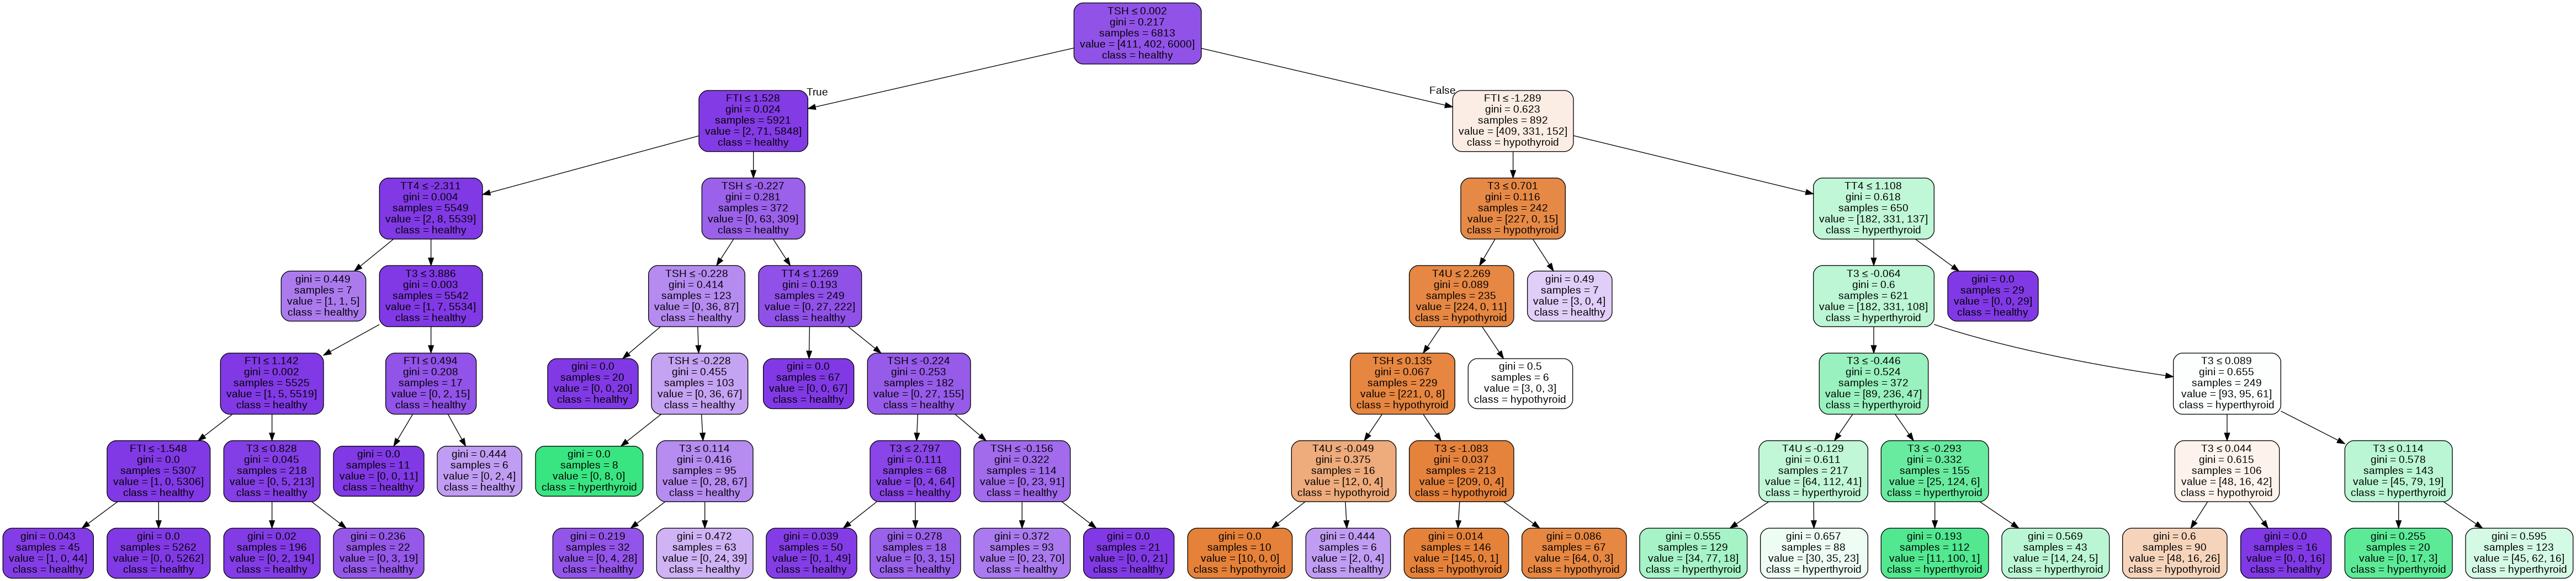

In [219]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
labels = ['hypothyroid', 'hyperthyroid', 'healthy']
dot_data = tree.export_graphviz(Tree_clf, out_file=None, 
                         feature_names=features,  
                         class_names=labels,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

# Submission

To test and submit your code, you should modify the two .py file in submission/starting_kit

## Work to do

The work here is to make a :

- FeatureExtractor to preprocess the data sets 
- Classifier to make your model to predict the labels.

####FeatureExtractor####

Deal with the missing datas, choose the useful features, then transform them and scale them for classification (below is a simple example which is just drop the binary featurea).

In [220]:
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np

class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def transform(self, X):
        cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
        ct = make_column_transformer(('passthrough', cols))
        XX = ct.fit_transform(X)
        imp = SimpleImputer(strategy='most_frequent')
        XX_ = imp.fit_transform(XX)
        return XX_

####Classifier####

Choose the suitable classfier and follow the structure of the "Classifier" class below (here is just a simple random forest classifier).

In [221]:
from sklearn.base import BaseEstimator


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = Pipeline([
            ('classifier', RandomForestClassifier(max_depth=6, min_samples_split=6, 
                             min_samples_leaf=4,
                             class_weight="balanced_subsample",random_state=0))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

## Local testing (before submission)

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `classifier.py` and `feature_extractor.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

References : 

$[1]$ Treatment for primary hypothyroidism: current approaches and future possibilities, Ali J Chakera, Simon HS Pearce, and Bijay Vaidya1